In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [161]:
# Load data
data = np.loadtxt('CL_vs_YCP.txt', delimiter=',')
CL = data[:, 0]
y_cp = data[:, 1]


data_pos = np.loadtxt('CL_vs_YCP_pos.txt', delimiter=',')
CL_pos = data_pos[:, 0]
y_cp_pos = data_pos[:, 1]

data_neg = np.loadtxt('CL_vs_YCP_neg.txt', delimiter=',')
CL_neg = data_neg[:, 0]
y_cp_neg = data_neg[:, 1]


In [164]:
def func(CL, A, B, C):
    return A*np.exp(-B*CL) + C  

def func_neg(CL, A, B, C, D):
    return A / (CL - D) + B + C * CL  # D avoids division by zero


params_pos, covariance = curve_fit(func, CL_pos, y_cp_pos)
A_pos, B_pos, C_pos = params_pos

params_neg, covariance = curve_fit(func_neg, CL_neg, y_cp_neg)
A_neg, B_neg, C_neg, D_neg = params_neg

print(f"Curva positiva: A = {A_pos:.4f}, B = {B_pos:.4f}, C = {C_pos:.4f}")
print(f"Curva negativa: D = {A_neg:.4f}, E = {D_neg:.4f}, G = {B_neg:.4f}, F = {C_neg:.4f}")

CL_fit_neg = np.linspace(min(CL_neg), max(CL_neg), 100)
CL_fit_pos = np.linspace(min(CL_pos), max(CL_pos), 100)
yfit_pos = func(CL_fit_pos, A_pos, B_pos, C_pos)
yfit_neg = func_neg(CL_fit_neg, A_neg, B_neg, C_neg, D_neg)


Curva positiva: A = 7.3164, B = 7.2129, C = 0.0646
Curva negativa: D = 0.0190, E = -0.0578, G = -0.1819, F = -0.1085


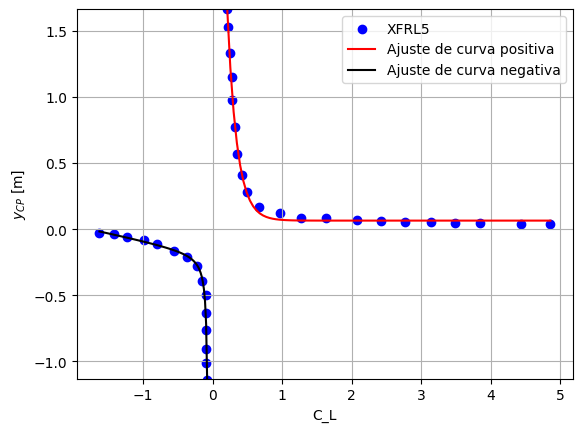

In [163]:
data_com = np.loadtxt('CL_vs_YCP.txt', delimiter=',')

plt.figure(dpi = 100)
plt.scatter(CL_pos, y_cp_pos, color = 'b', label = 'XFRL5')
plt.scatter(CL_neg, y_cp_neg, color = 'b')
plt.plot(CL_fit_pos, yfit_pos, color = 'r', label = 'Ajuste de curva positiva')
plt.plot(CL_fit_neg, yfit_neg, color = 'k', label = 'Ajuste de curva negativa')
plt.grid()
plt.legend()
plt.ylabel(r'$y_{CP}$ [m]')
plt.xlabel(r'C_L')
plt.ylim([np.min(data_com[:, 1]), np.max(data_com[:, 1])])
plt.show()

